## Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Adyatma I S
- **Email:** atmasusanto38+dicoding@gmail.com
- **ID Dicoding:** sdkfz_y0bk

<h1>Define Business Question</h1>
<li>How is the trend of bike sharing user growth from 2011-2012?</li>
<li>What is the correlation between year and regular/casual bike sharing user?</li>
<li>How does weather situation affect user count?</li>
<li>What is the relation between month and bike sharing user count?</li>
<li>What is the pattern user count during 2011-2012?</li>

## Import Semua Packages/Library yang Digunakan

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

<h1>Data Wranggling</h1>

### Gathering Data

In [61]:
data: pd.DataFrame = pd.read_csv('./data/day.csv')

**Insight:**
- Data successfully imported from a CSV file.

### Assessing Data

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [63]:
data.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instant     731 non-null    bool 
 1   dteday      731 non-null    bool 
 2   season      731 non-null    bool 
 3   yr          731 non-null    bool 
 4   mnth        731 non-null    bool 
 5   holiday     731 non-null    bool 
 6   weekday     731 non-null    bool 
 7   workingday  731 non-null    bool 
 8   weathersit  731 non-null    bool 
 9   temp        731 non-null    bool 
 10  atemp       731 non-null    bool 
 11  hum         731 non-null    bool 
 12  windspeed   731 non-null    bool 
 13  casual      731 non-null    bool 
 14  registered  731 non-null    bool 
 15  cnt         731 non-null    bool 
dtypes: bool(16)
memory usage: 11.5 KB


In [64]:
data.duplicated().value_counts()

False    731
Name: count, dtype: int64

In [65]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- From the code we conclude that no null data is found.
- From the code we also conclude that the data has no duplicate.
- The data also has no invalid data e.g. month 13, month 0
- After assesing the data, we will change some the column dtype to appropiate dtype and rename some column (data cleaning).

### Cleaning Data

Next we rename some of the column to more human readable name and drop `instant` column because it serve no purpose other than being index of the csv file (it's redundant in this case).

In [66]:
data.rename(columns={"yr": "year", "mnth": "month", "dteday": "date"}, inplace=True)

In [67]:
data.drop(['instant'], axis=1, inplace=True)

After dropping we rename value of the column from int value to categorical value based on the dataset readme.

In [68]:
data['weathersit'] = data['weathersit'].replace({1: 'Clear/Few Cloud', 2: 'Misty/Cloudy',
                                                  3: 'Light Snow/Shower',4: 'Severe Thunderstorm/Blizzard'})
data['season'] = data['season'].replace({ 1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
data['year'] = data['year'].replace({0: '2011', 1: '2012'})
data['workingday'] = data['workingday'].replace({0: 'Yes', 1: 'No'})

data['date'] = pd.to_datetime(data['date'])
data['season'] = data['season'].astype('category')
data['year'] = data['year'].astype('category')
data['workingday'] = data['workingday'].astype('category')

### Final Result

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    category      
 3   month       731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(3), datetime64[ns](1), float64(4), int64(6), object(1)
memory 

**Insight:**
- We see some data has wrong dtype like date.
- We then replace some numeric value to categorical value for easier visualization.
- The data is from 2011 to 2012 only.
- We also drop one feature (instant) because it's not needed.

# EDA

<h3>Explore Bicycle Rental Trend From 2011-2012</h3>

In [95]:
bike_user_trend = data.groupby(by="year", observed=False).agg({
    "cnt": "sum"
}).reset_index()
bike_user_trend

,year,cnt
0,2011,1243103
1,2012,2049576


<h3>Explore Segmented Bicycle Rental Trend From 2011-2012</h3>

In [94]:
segmented_user = data.groupby(by=["year"], observed=True).agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()
segmented_user

,year,casual,registered
0,2011,247252,995851
1,2012,372765,1676811


<h3>Explore Bike User Count Trend For Each Month</h3>

In [91]:
user_per_month = data.groupby(by=["month"], observed=True).agg({
    "cnt": "mean",
}).reset_index()
user_per_month

,month,cnt
0,1,2176.338710
1,2,2655.298246
2,3,3692.258065
3,4,4484.900000
4,5,5349.774194
5,6,5772.366667
6,7,5563.677419
7,8,5664.419355
8,9,5766.516667
9,10,5199.225806


<h3>Bike User Count Trend For Each Weather Situation</h3>

In [92]:
mean_user_by_weather = data.groupby(by=["weathersit"], observed=True).agg({
    "cnt": "mean",
}).reset_index()
mean_user_by_weather

,weathersit,cnt
0,Clear/Few Cloud,4876.786177
1,Light Snow/Shower,1803.285714
2,Misty/Cloudy,4035.862348


<h3>Explore Bike User Count Trend</h3>

In [93]:
daily_bike_count = data.resample(rule='D', on='date').agg({
        "cnt": "sum"
    }).reset_index()
daily_bike_count

,date,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


**Insight:**
- Following the previous graph, we segment the user to two type: casual and regular user. From the graph above, we see significant increase of registered user in 2012 compared to 2011. It it plausible that the bike sharing/rental company suceeded in making more user into registered user through advertising campaign.
- We see that there's significant growth from 2011 to 2012.
- More user bike during clear/few cloud weather situation. Weather seems to affect bike sharing user count.
- More user bike during summer break than winter break is the pattern we see from 2011 to 2012.

## Visualization & Explanatory Analysis

### Pertanyaan 1: How is the trend of bike sharing user growth from 2011-2012?

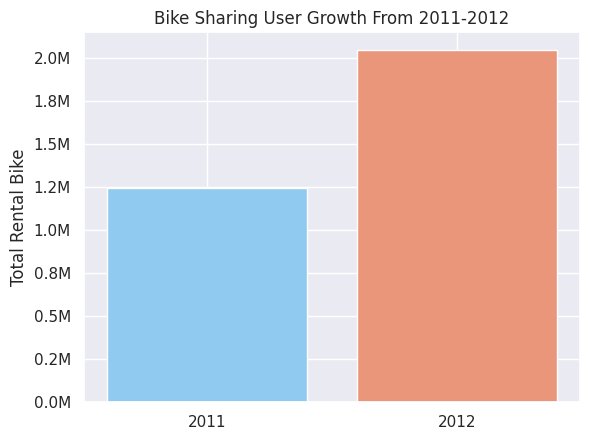

In [96]:
from matplotlib.ticker import FuncFormatter

def convert_to_millions(x, _):
        return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(convert_to_millions)

fig, ax = plt.subplots()
ax.bar(bike_user_trend.year, bike_user_trend.cnt, color=['#90CAF1', '#E9967A'])
ax.set_title("Bike Sharing User Growth From 2011-2012")
ax.set_ylabel("Total Rental Bike")
ax.yaxis.set_major_formatter(formatter)
plt.show()

### Pertanyaan 2: What is the correlation between year and registered/casual bike sharing user?

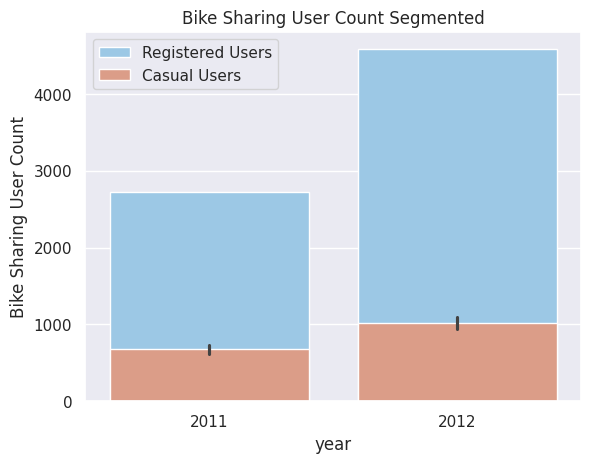

In [100]:
sns.barplot(x='year',y='registered',data=data, label='Registered Users', color='#90CAF1', errorbar=None)
sns.barplot(x='year',y='casual',data=data, label='Casual Users', color='#E9967A')
plt.title("Bike Sharing User Count Segmented")
plt.ylabel("Bike Sharing User Count")
plt.show()

### Pertanyaan 3: What is the relation between month and bike sharing user count?

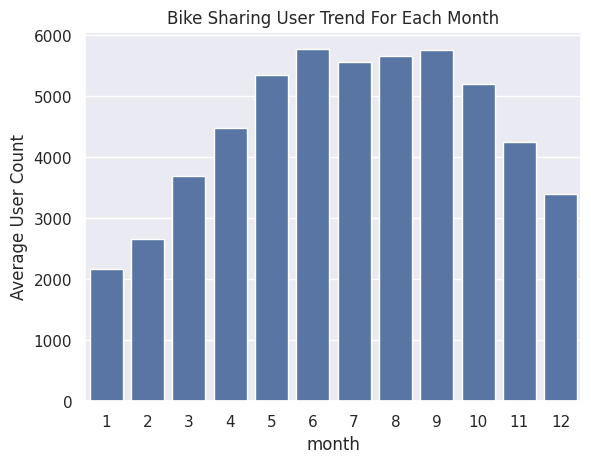

In [97]:
sns.barplot(x='month', y='cnt', data=user_per_month)
sns.set_theme()
plt.title("Bike Sharing User Trend For Each Month")
plt.ylabel("Average User Count")
plt.show()

### Pertanyaan 4: How does weather situation affect user count?

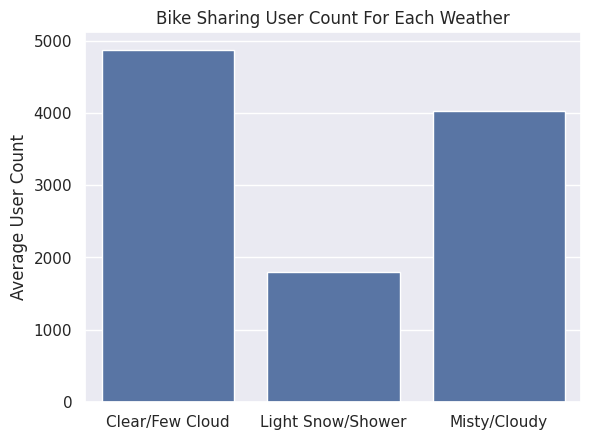

In [98]:
sns.barplot(x='weathersit', y='cnt', data=mean_user_by_weather)
sns.set_theme()
plt.title("Bike Sharing User Count For Each Weather")
plt.ylabel("Average User Count")
plt.xlabel(None) # type: ignore
plt.show()

### Pertanyaan 5: What is the pattern user count during 2011-2012?

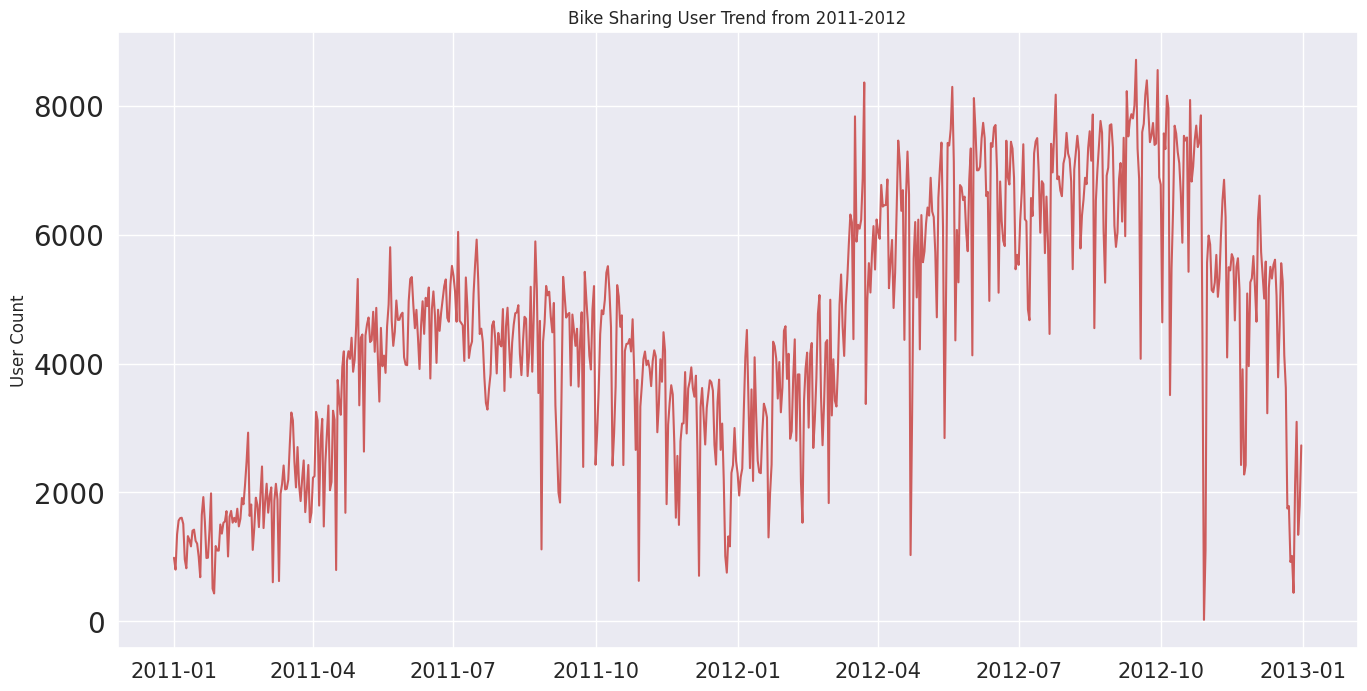

In [99]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    daily_bike_count["date"],
    daily_bike_count["cnt"],
    linewidth=1.5,
    color="#CD5C5C"
)
plt.title("Bike Sharing User Trend from 2011-2012")
ax.set_ylabel("User Count")
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)


**Insight:**
- From the graph we see that the user count trends upward and see almost 2x growth from 2011 to 2012. And as the year goes, bike sharing user count increases, indicating positive correlation.
- Form the graph above, we see that it trends upward during summer break then trend downward during winter break. That means month doesn't have postive nor negative correlation with bike sharing user count.
- Based on the bar plot above, we can see that most bike sharing user bike during clear/few cloud weather followed by misty and cloudy. This means weather affect bike sharing user count.
- Based on the time series graph, we conclude that there's a spike during summer month and a drop during the fall and winter. It is the case for 2011 and 2012. The spike in summer might be caused by summer break.

<h3>Extra: Bike User Dataset Heatmap</h3>

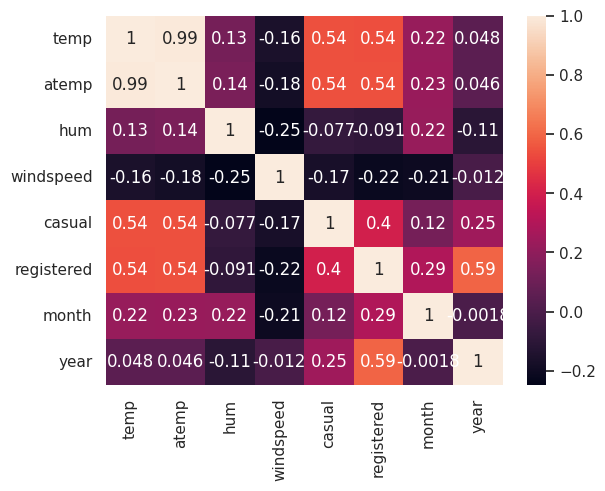

In [79]:
heatmap = data[['temp','atemp','hum','windspeed','casual','registered', 'month', 'year']].corr()

sns.heatmap(heatmap, annot=True)

plt.show()

Based on the heatmap above, we see some feature are correlated to each other like registered with year. Some feature are highly correlated like atemp and temp. We can drop one of those feature when using the dataset to make predictions with ML model.

# Summary

<li>How is the trend of bike sharing user growth from 2011-2012?</li>
    <ul>We see that there's an updward growth during 2011-2012</ul>
<li>What is the correlation between year and registered/casual bike sharing user?</li>
    <ul>As the years goes on, registered/casual bike sharing user increase, but registered user growth is significanly higher.</ul>
<li>How does weather situation affect user count?</li>
    <ul>Clear/Few cloud weather has the most average bike sharing user count.</ul>
<li>What is the relation between month and bike sharing user count?</li>
    <ul>The bike sharing user count doesn't go upward as the month goes, but it is the highest during summer break and the lowest during winter break. It's like a parabola.</ul>
<li>What is the pattern user count during 2011-2012?</li>
    <ul>The bike sharing user count is low during beggining of the year, but increases in the middle of the year (summer break) then decrease when nearing the end of the year. The pattern holds for 2011 and 2012.</ul>